## Predicting Faulty Steel Plates  

This dataset from the Semeion, Research Center of Sciences of Communication is used to correctly classify surface defect types in stainless steel plates. 

There were seven defect types that were identified in the dataset:
- Pastry
- Z_Scratch
- K_Scatch (misspelled but corrected later)
- Stains
- Dirtiness
- Bumps
- Other Faults

Twenty seven indicators were used to describe the geometric shape and outline of the defect of steel plates:
- X_Minimum
- X_Maximum
- Y_Minimum
- Y_Maximum
- Pixels_Areas
- X_Perimeter
- Y_Perimeter
- Sum_of_Luminosity
- Minimum_of_Luminosity
- Maximum_of_Luminosity
- Length_of_Conveyer
- TypeOfSteel_A300
- TypeOfSteel_A400
- Steel_Plate_Thickness
- Edges_Index
- Empty_Index
- Square_Index
- Outside_X_Index
- Edges_X_Index
- Edges_Y_Index
- Outside_Global_Index
- LogOfAreas
- Log_X_Index
- Log_Y_Index
- Orientation_Index
- Luminosity_Index
- SigmoidOfAreas

Model Testing, Fit, and Feature Importance

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

In [0]:
df = spark.table("FSP.faults").toPandas()
df

X_Minimum 
 X_Maximum 
 Y_Minimum 
 Y_Maximum 
 Pixels_Areas 
 X_Perimeter 
 Y_Perimeter 
 Sum_of_Luminosity 
 Minimum_of_Luminosity 
 Maximum_of_Luminosity 
 Length_of_Conveyer 
 TypeOfSteel_A300 
 TypeOfSteel_A400 
 Steel_Plate_Thickness 
 Edges_Index 
 Empty_Index 
 Square_Index 
 Outside_X_Index 
 Edges_X_Index 
 Edges_Y_Index 
 Outside_Global_Index 
 LogOfAreas 
 Log_X_Index 
 Log_Y_Index 
 Orientation_Index 
 Luminosity_Index 
 SigmoidOfAreas 
 Pastry 
 Z_Scratch 
 K_Scatch 
 Stains 
 Dirtiness 
 Bumps 
 Other_Faults 
 
 
 
 
 0 
 42 
 50 
 270900 
 270944 
 267 
 17 
 44 
 24220 
 76 
 108 
 1687 
 1 
 0 
 80 
 0.0498 
 0.2415 
 0.1818 
 0.0047 
 0.4706 
 1 
 1 
 2.4265 
 0.9031 
 1.6435 
 0.8182 
 -0.2913 
 0.5822 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 645 
 651 
 2538079 
 2538108 
 108 
 10 
 30 
 11397 
 84 
 123 
 1687 
 1 
 0 
 80 
 0.7647 
 0.3793 
 0.2069 
 0.0036 
 0.6 
 0.9667 
 1 
 2.0334 
 0.7782 
 1.4624 
 0.7931 
 -0.1756 
 0.2984 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 829 
 835 
 1553913 
 1553931 
 71 
 8 
 19 
 7972 
 99 
 125 
 1623 
 1 
 0 
 100 
 0.971 
 0.3426 
 0.3333 
 0.0037 
 0.75 
 0.9474 
 1 
 1.8513 
 0.7782 
 1.2553 
 0.6667 
 -0.1228 
 0.215 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 853 
 860 
 369370 
 369415 
 176 
 13 
 45 
 18996 
 99 
 126 
 1353 
 0 
 1 
 290 
 0.7287 
 0.4413 
 0.1556 
 0.0052 
 0.5385 
 1 
 1 
 2.2455 
 0.8451 
 1.6532 
 0.8444 
 -0.1568 
 0.5212 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 1289 
 1306 
 498078 
 498335 
 2409 
 60 
 260 
 246930 
 37 
 126 
 1353 
 0 
 1 
 185 
 0.0695 
 0.4486 
 0.0662 
 0.0126 
 0.2833 
 0.9885 
 1 
 3.3818 
 1.2305 
 2.4099 
 0.9338 
 -0.1992 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1936 
 249 
 277 
 325780 
 325796 
 273 
 54 
 22 
 35033 
 119 
 141 
 1360 
 0 
 1 
 40 
 0.3662 
 0.3906 
 0.5714 
 0.0206 
 0.5185 
 0.7273 
 0 
 2.4362 
 1.4472 
 1.2041 
 -0.4286 
 0.0026 
 0.7254 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 1937 
 144 
 175 
 340581 
 340598 
 287 
 44 
 24 
 34599 
 112 
 133 
 1360 
 0 
 1 
 40 
 0.2118 
 0.4554 
 0.5484 
 0.0228 
 0.7046 
 0.7083 
 0 
 2.4579 
 1.4914 
 1.2305 
 -0.4516 
 -0.0582 
 0.8173 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 1938 
 145 
 174 
 386779 
 386794 
 292 
 40 
 22 
 37572 
 120 
 140 
 1360 
 0 
 1 
 40 
 0.2132 
 0.3287 
 0.5172 
 0.0213 
 0.725 
 0.6818 
 0 
 2.4654 
 1.4624 
 1.1761 
 -0.4828 
 0.0052 
 0.7079 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 1939 
 137 
 170 
 422497 
 422528 
 419 
 97 
 47 
 52715 
 117 
 140 
 1360 
 0 
 1 
 40 
 0.2015 
 0.5904 
 0.9394 
 0.0243 
 0.3402 
 0.6596 
 0 
 2.6222 
 1.5185 
 1.4914 
 -0.0606 
 -0.0171 
 0.9919 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 1940 
 1261 
 1281 
 87951 
 87967 
 103 
 26 
 22 
 11682 
 101 
 133 
 1360 
 1 
 0 
 80 
 0.1162 
 0.6781 
 0.8 
 0.0147 
 0.7692 
 0.7273 
 0 
 2.0128 
 1.301 
 1.2041 
 -0.2 
 -0.1139 
 0.5296 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 
 1941 rows × 34 columns

In [0]:
df.columns

Out[3]: Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

7 different types of faults. Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults

In [0]:
# Reversing the one hot encoding : https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas
# A better implementation: https://dkhundley.medium.com/data-science-quick-tips-001-reversing-one-hot-encoding-b0c9a892356b
labels = (df[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']].astype('int')).idxmax(1)
df['Labels'] = labels
df

X_Minimum 
 X_Maximum 
 Y_Minimum 
 Y_Maximum 
 Pixels_Areas 
 X_Perimeter 
 Y_Perimeter 
 Sum_of_Luminosity 
 Minimum_of_Luminosity 
 Maximum_of_Luminosity 
 Length_of_Conveyer 
 TypeOfSteel_A300 
 TypeOfSteel_A400 
 Steel_Plate_Thickness 
 Edges_Index 
 Empty_Index 
 Square_Index 
 Outside_X_Index 
 Edges_X_Index 
 Edges_Y_Index 
 Outside_Global_Index 
 LogOfAreas 
 Log_X_Index 
 Log_Y_Index 
 Orientation_Index 
 Luminosity_Index 
 SigmoidOfAreas 
 Pastry 
 Z_Scratch 
 K_Scatch 
 Stains 
 Dirtiness 
 Bumps 
 Other_Faults 
 Labels 
 
 
 
 
 0 
 42 
 50 
 270900 
 270944 
 267 
 17 
 44 
 24220 
 76 
 108 
 1687 
 1 
 0 
 80 
 0.0498 
 0.2415 
 0.1818 
 0.0047 
 0.4706 
 1 
 1 
 2.4265 
 0.9031 
 1.6435 
 0.8182 
 -0.2913 
 0.5822 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 Pastry 
 
 
 1 
 645 
 651 
 2538079 
 2538108 
 108 
 10 
 30 
 11397 
 84 
 123 
 1687 
 1 
 0 
 80 
 0.7647 
 0.3793 
 0.2069 
 0.0036 
 0.6 
 0.9667 
 1 
 2.0334 
 0.7782 
 1.4624 
 0.7931 
 -0.1756 
 0.2984 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 Pastry 
 
 
 2 
 829 
 835 
 1553913 
 1553931 
 71 
 8 
 19 
 7972 
 99 
 125 
 1623 
 1 
 0 
 100 
 0.971 
 0.3426 
 0.3333 
 0.0037 
 0.75 
 0.9474 
 1 
 1.8513 
 0.7782 
 1.2553 
 0.6667 
 -0.1228 
 0.215 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 Pastry 
 
 
 3 
 853 
 860 
 369370 
 369415 
 176 
 13 
 45 
 18996 
 99 
 126 
 1353 
 0 
 1 
 290 
 0.7287 
 0.4413 
 0.1556 
 0.0052 
 0.5385 
 1 
 1 
 2.2455 
 0.8451 
 1.6532 
 0.8444 
 -0.1568 
 0.5212 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 Pastry 
 
 
 4 
 1289 
 1306 
 498078 
 498335 
 2409 
 60 
 260 
 246930 
 37 
 126 
 1353 
 0 
 1 
 185 
 0.0695 
 0.4486 
 0.0662 
 0.0126 
 0.2833 
 0.9885 
 1 
 3.3818 
 1.2305 
 2.4099 
 0.9338 
 -0.1992 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 Pastry 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1936 
 249 
 277 
 325780 
 325796 
 273 
 54 
 22 
 35033 
 119 
 141 
 1360 
 0 
 1 
 40 
 0.3662 
 0.3906 
 0.5714 
 0.0206 
 0.5185 
 0.7273 
 0 
 2.4362 
 1.4472 
 1.2041 
 -0.4286 
 0.0026 
 0.7254 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 Other_Faults 
 
 
 1937 
 144 
 175 
 340581 
 340598 
 287 
 44 
 24 
 34599 
 112 
 133 
 1360 
 0 
 1 
 40 
 0.2118 
 0.4554 
 0.5484 
 0.0228 
 0.7046 
 0.7083 
 0 
 2.4579 
 1.4914 
 1.2305 
 -0.4516 
 -0.0582 
 0.8173 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 Other_Faults 
 
 
 1938 
 145 
 174 
 386779 
 386794 
 292 
 40 
 22 
 37572 
 120 
 140 
 1360 
 0 
 1 
 40 
 0.2132 
 0.3287 
 0.5172 
 0.0213 
 0.725 
 0.6818 
 0 
 2.4654 
 1.4624 
 1.1761 
 -0.4828 
 0.0052 
 0.7079 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 Other_Faults 
 
 
 1939 
 137 
 170 
 422497 
 422528 
 419 
 97 
 47 
 52715 
 117 
 140 
 1360 
 0 
 1 
 40 
 0.2015 
 0.5904 
 0.9394 
 0.0243 
 0.3402 
 0.6596 
 0 
 2.6222 
 1.5185 
 1.4914 
 -0.0606 
 -0.0171 
 0.9919 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 Other_Faults 
 
 
 1940 
 1261 
 1281 
 87951 
 87967 
 103 
 26 
 22 
 11682 
 101 
 133 
 1360 
 1 
 0 
 80 
 0.1162 
 0.6781 
 0.8 
 0.0147 
 0.7692 
 0.7273 
 0 
 2.0128 
 1.301 
 1.2041 
 -0.2 
 -0.1139 
 0.5296 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 Other_Faults 
 
 
 
 1941 rows × 35 columns

In [0]:
# Correcting the misspelling of K-scatch --> K-Scratch
df['Labels']=df['Labels'].replace('K_Scatch','K_Scratch')
df.Labels.unique()

Out[5]: array(['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps',
       'Other_Faults'], dtype=object)

In [0]:
features_df = df.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains','Dirtiness', 'Bumps', 'Other_Faults'], axis = 1)
features_df

X_Minimum 
 X_Maximum 
 Y_Minimum 
 Y_Maximum 
 Pixels_Areas 
 X_Perimeter 
 Y_Perimeter 
 Sum_of_Luminosity 
 Minimum_of_Luminosity 
 Maximum_of_Luminosity 
 Length_of_Conveyer 
 TypeOfSteel_A300 
 TypeOfSteel_A400 
 Steel_Plate_Thickness 
 Edges_Index 
 Empty_Index 
 Square_Index 
 Outside_X_Index 
 Edges_X_Index 
 Edges_Y_Index 
 Outside_Global_Index 
 LogOfAreas 
 Log_X_Index 
 Log_Y_Index 
 Orientation_Index 
 Luminosity_Index 
 SigmoidOfAreas 
 Labels 
 
 
 
 
 0 
 42 
 50 
 270900 
 270944 
 267 
 17 
 44 
 24220 
 76 
 108 
 1687 
 1 
 0 
 80 
 0.0498 
 0.2415 
 0.1818 
 0.0047 
 0.4706 
 1 
 1 
 2.4265 
 0.9031 
 1.6435 
 0.8182 
 -0.2913 
 0.5822 
 Pastry 
 
 
 1 
 645 
 651 
 2538079 
 2538108 
 108 
 10 
 30 
 11397 
 84 
 123 
 1687 
 1 
 0 
 80 
 0.7647 
 0.3793 
 0.2069 
 0.0036 
 0.6 
 0.9667 
 1 
 2.0334 
 0.7782 
 1.4624 
 0.7931 
 -0.1756 
 0.2984 
 Pastry 
 
 
 2 
 829 
 835 
 1553913 
 1553931 
 71 
 8 
 19 
 7972 
 99 
 125 
 1623 
 1 
 0 
 100 
 0.971 
 0.3426 
 0.3333 
 0.0037 
 0.75 
 0.9474 
 1 
 1.8513 
 0.7782 
 1.2553 
 0.6667 
 -0.1228 
 0.215 
 Pastry 
 
 
 3 
 853 
 860 
 369370 
 369415 
 176 
 13 
 45 
 18996 
 99 
 126 
 1353 
 0 
 1 
 290 
 0.7287 
 0.4413 
 0.1556 
 0.0052 
 0.5385 
 1 
 1 
 2.2455 
 0.8451 
 1.6532 
 0.8444 
 -0.1568 
 0.5212 
 Pastry 
 
 
 4 
 1289 
 1306 
 498078 
 498335 
 2409 
 60 
 260 
 246930 
 37 
 126 
 1353 
 0 
 1 
 185 
 0.0695 
 0.4486 
 0.0662 
 0.0126 
 0.2833 
 0.9885 
 1 
 3.3818 
 1.2305 
 2.4099 
 0.9338 
 -0.1992 
 1 
 Pastry 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1936 
 249 
 277 
 325780 
 325796 
 273 
 54 
 22 
 35033 
 119 
 141 
 1360 
 0 
 1 
 40 
 0.3662 
 0.3906 
 0.5714 
 0.0206 
 0.5185 
 0.7273 
 0 
 2.4362 
 1.4472 
 1.2041 
 -0.4286 
 0.0026 
 0.7254 
 Other_Faults 
 
 
 1937 
 144 
 175 
 340581 
 340598 
 287 
 44 
 24 
 34599 
 112 
 133 
 1360 
 0 
 1 
 40 
 0.2118 
 0.4554 
 0.5484 
 0.0228 
 0.7046 
 0.7083 
 0 
 2.4579 
 1.4914 
 1.2305 
 -0.4516 
 -0.0582 
 0.8173 
 Other_Faults 
 
 
 1938 
 145 
 174 
 386779 
 386794 
 292 
 40 
 22 
 37572 
 120 
 140 
 1360 
 0 
 1 
 40 
 0.2132 
 0.3287 
 0.5172 
 0.0213 
 0.725 
 0.6818 
 0 
 2.4654 
 1.4624 
 1.1761 
 -0.4828 
 0.0052 
 0.7079 
 Other_Faults 
 
 
 1939 
 137 
 170 
 422497 
 422528 
 419 
 97 
 47 
 52715 
 117 
 140 
 1360 
 0 
 1 
 40 
 0.2015 
 0.5904 
 0.9394 
 0.0243 
 0.3402 
 0.6596 
 0 
 2.6222 
 1.5185 
 1.4914 
 -0.0606 
 -0.0171 
 0.9919 
 Other_Faults 
 
 
 1940 
 1261 
 1281 
 87951 
 87967 
 103 
 26 
 22 
 11682 
 101 
 133 
 1360 
 1 
 0 
 80 
 0.1162 
 0.6781 
 0.8 
 0.0147 
 0.7692 
 0.7273 
 0 
 2.0128 
 1.301 
 1.2041 
 -0.2 
 -0.1139 
 0.5296 
 Other_Faults 
 
 
 
 1941 rows × 28 columns

In [0]:
# Questions I can ask: which 3 faults were most common, least common? % of each
# More with group by https://sparkbyexamples.com/pandas/pandas-groupby-count-examples/
features_df.groupby('Labels')[['Labels']].count()

Labels 
 
 
 Labels 
 
 
 
 
 
 Bumps 
 402 
 
 
 Dirtiness 
 55 
 
 
 K_Scratch 
 391 
 
 
 Other_Faults 
 673 
 
 
 Pastry 
 158 
 
 
 Stains 
 72 
 
 
 Z_Scratch 
 190

In [0]:
percentages = np.round(features_df.Labels.value_counts(normalize = True)*100, 2)

print(f"Fault Percentages:")
pd.DataFrame(percentages)

Fault Percentages:


Labels 
 
 
 
 
 Other_Faults 
 34.67 
 
 
 Bumps 
 20.71 
 
 
 K_Scratch 
 20.14 
 
 
 Z_Scratch 
 9.79 
 
 
 Pastry 
 8.14 
 
 
 Stains 
 3.71 
 
 
 Dirtiness 
 2.83

Other faults make up the majority of the defects (34.67%) but that really could encompass a variety of defect types with different causes. For a future project, it may be a great subset of data to implement an unsupervised cluster model to detect different types of defects inside of the label 'other defects'.

# Defects for the Model
Bumps, K-Scratches, and Z-Scratches make up 77.52% of all identifiable defects. I'll focus on those defects for the rest of the study.

In [0]:
# Only focusing on the top identifiable defects
top_defects = features_df[(features_df['Labels']=='Bumps')|(features_df['Labels']=='K_Scratch')|(features_df['Labels']=='Z_Scratch')]
top_defects

# All Defects that have been identified
id_defects = features_df[(features_df['Labels']!='Other_Faults')] 
id_defects

X_Minimum 
 X_Maximum 
 Y_Minimum 
 Y_Maximum 
 Pixels_Areas 
 X_Perimeter 
 Y_Perimeter 
 Sum_of_Luminosity 
 Minimum_of_Luminosity 
 Maximum_of_Luminosity 
 Length_of_Conveyer 
 TypeOfSteel_A300 
 TypeOfSteel_A400 
 Steel_Plate_Thickness 
 Edges_Index 
 Empty_Index 
 Square_Index 
 Outside_X_Index 
 Edges_X_Index 
 Edges_Y_Index 
 Outside_Global_Index 
 LogOfAreas 
 Log_X_Index 
 Log_Y_Index 
 Orientation_Index 
 Luminosity_Index 
 SigmoidOfAreas 
 Labels 
 
 
 
 
 0 
 42 
 50 
 270900 
 270944 
 267 
 17 
 44 
 24220 
 76 
 108 
 1687 
 1 
 0 
 80 
 0.0498 
 0.2415 
 0.1818 
 0.0047 
 0.4706 
 1 
 1 
 2.4265 
 0.9031 
 1.6435 
 0.8182 
 -0.2913 
 0.5822 
 Pastry 
 
 
 1 
 645 
 651 
 2538079 
 2538108 
 108 
 10 
 30 
 11397 
 84 
 123 
 1687 
 1 
 0 
 80 
 0.7647 
 0.3793 
 0.2069 
 0.0036 
 0.6 
 0.9667 
 1 
 2.0334 
 0.7782 
 1.4624 
 0.7931 
 -0.1756 
 0.2984 
 Pastry 
 
 
 2 
 829 
 835 
 1553913 
 1553931 
 71 
 8 
 19 
 7972 
 99 
 125 
 1623 
 1 
 0 
 100 
 0.971 
 0.3426 
 0.3333 
 0.0037 
 0.75 
 0.9474 
 1 
 1.8513 
 0.7782 
 1.2553 
 0.6667 
 -0.1228 
 0.215 
 Pastry 
 
 
 3 
 853 
 860 
 369370 
 369415 
 176 
 13 
 45 
 18996 
 99 
 126 
 1353 
 0 
 1 
 290 
 0.7287 
 0.4413 
 0.1556 
 0.0052 
 0.5385 
 1 
 1 
 2.2455 
 0.8451 
 1.6532 
 0.8444 
 -0.1568 
 0.5212 
 Pastry 
 
 
 4 
 1289 
 1306 
 498078 
 498335 
 2409 
 60 
 260 
 246930 
 37 
 126 
 1353 
 0 
 1 
 185 
 0.0695 
 0.4486 
 0.0662 
 0.0126 
 0.2833 
 0.9885 
 1 
 3.3818 
 1.2305 
 2.4099 
 0.9338 
 -0.1992 
 1 
 Pastry 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1263 
 221 
 242 
 3948212 
 3948253 
 519 
 33 
 41 
 48309 
 65 
 124 
 1360 
 1 
 0 
 200 
 0.325 
 0.3972 
 0.5122 
 0.0154 
 0.6364 
 1 
 1 
 2.7152 
 1.3222 
 1.6128 
 0.4878 
 -0.2728 
 0.9765 
 Bumps 
 
 
 1264 
 1111 
 1121 
 4032298 
 4032320 
 110 
 20 
 22 
 12351 
 100 
 127 
 1354 
 1 
 0 
 200 
 0.3442 
 0.5 
 0.4545 
 0.0074 
 0.5 
 1 
 1 
 2.0414 
 1 
 1.3424 
 0.5454 
 -0.1228 
 0.3663 
 Bumps 
 
 
 1265 
 995 
 1006 
 4085316 
 4085344 
 140 
 25 
 28 
 16076 
 103 
 132 
 1356 
 1 
 0 
 200 
 0.5162 
 0.5454 
 0.3929 
 0.0081 
 0.44 
 1 
 1 
 2.1461 
 1.0414 
 1.4472 
 0.6071 
 -0.1029 
 0.5096 
 Bumps 
 
 
 1266 
 396 
 418 
 4116853 
 4116868 
 231 
 26 
 16 
 25096 
 56 
 141 
 1356 
 1 
 0 
 200 
 0.5841 
 0.3 
 0.6818 
 0.0162 
 0.8461 
 0.9375 
 0 
 2.3636 
 1.3424 
 1.1761 
 -0.3182 
 -0.1512 
 0.5461 
 Bumps 
 
 
 1267 
 604 
 646 
 4441757 
 4441811 
 1035 
 67 
 55 
 97966 
 46 
 125 
 1356 
 1 
 0 
 200 
 0.8909 
 0.5436 
 0.7778 
 0.031 
 0.6269 
 0.9818 
 1 
 3.0149 
 1.6233 
 1.7324 
 0.2222 
 -0.2605 
 1 
 Bumps 
 
 
 
 1268 rows × 28 columns

In [0]:
# Percentage breakdown of defects that have been identified
pd.DataFrame(np.round(id_defects['Labels'].value_counts(normalize = True)*100, 2))

Labels 
 
 
 
 
 Bumps 
 31.70 
 
 
 K_Scratch 
 30.84 
 
 
 Z_Scratch 
 14.98 
 
 
 Pastry 
 12.46 
 
 
 Stains 
 5.68 
 
 
 Dirtiness 
 4.34

# PCA

In [0]:
# Standardize/scale the dataset and apply PCA w/ Normalization (Standard Scaling)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [0]:
names=[i for i in top_defects.columns if 'Label' not in i]
x = top_defects[names].dropna()
scaler = StandardScaler()
pca = PCA(.999)

pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

features = range(pca.n_components_)


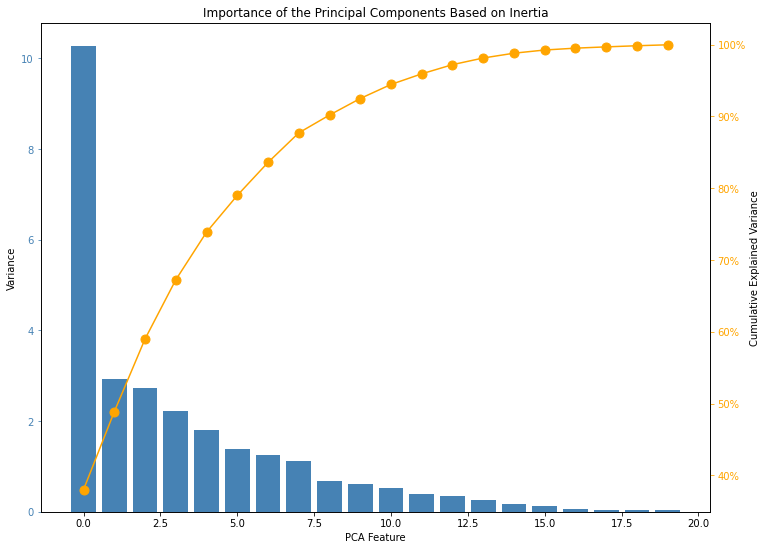

In [0]:
# Pareto Chart

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'orange'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots(figsize = (12, 9))
ax.bar(features, pca.explained_variance_, color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(features, np.cumsum(pca.explained_variance_ratio_), color=color2, marker="o", ms=line_size+5)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax = 1))

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

# Hide Grid Lines
ax.grid(False)
ax2.grid(False)

# Setting Labels for the X and Y axes as well as the title
ax.set_xlabel('PCA Feature')
ax.set_ylabel('Variance')
ax2.set_ylabel('Cumulative Explained Variance')#, rotation = 270)
plt.title("Importance of the Principal Components Based on Inertia")
# plt.grid(True)
#display Pareto chart
plt.show()

In [0]:
# PCA summary

pca_summary = pd.DataFrame(np.abs(pca.components_)).T
# Columns = pca components, rows the name of the column

pca_summary.columns = ['pc{}'.format(i+1) for i in range(len(pca.components_))]
pca_summary['Original Tag'] = names

#Highlight maxes per column 
# Reference: https://pandas.pydata.org/docs/user_guide/style.html

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
def highlight_maxes(s, props=''):
#     return np.where(s.isin(np.sort(s)[-3:]), props, '') 
    return np.where(s.isin(np.sort(s)[-3:]), props, '') 

 
s = pca_summary.style.apply(highlight_maxes, props='color:black;background-color:yellow', axis=0)

s.set_table_attributes("style='display:inline'").set_caption("PCA Contributions from Each Tag Accounting for 99.9% Variance")

PCA Contributions from Each Tag Accounting for 99.9% Variance 
 
 
   
 pc1 
 pc2 
 pc3 
 pc4 
 pc5 
 pc6 
 pc7 
 pc8 
 pc9 
 pc10 
 pc11 
 pc12 
 pc13 
 pc14 
 pc15 
 pc16 
 pc17 
 pc18 
 pc19 
 pc20 
 Original Tag 
 
 
 
 
 0 
 0.201850 
 0.077507 
 0.122318 
 0.240652 
 0.085094 
 0.444338 
 0.048800 
 0.234191 
 0.053605 
 0.217389 
 0.057134 
 0.086544 
 0.149455 
 0.035937 
 0.052382 
 0.047045 
 0.042236 
 0.016992 
 0.018171 
 0.013189 
 X_Minimum 
 
 
 1 
 0.163906 
 0.062477 
 0.134434 
 0.270743 
 0.120983 
 0.501804 
 0.066680 
 0.261287 
 0.046149 
 0.227700 
 0.091285 
 0.040640 
 0.130527 
 0.004660 
 0.035647 
 0.035143 
 0.027090 
 0.019807 
 0.000726 
 0.012417 
 X_Maximum 
 
 
 2 
 0.002179 
 0.119253 
 0.132313 
 0.463579 
 0.475220 
 0.045174 
 0.110477 
 0.063681 
 0.040232 
 0.057606 
 0.048790 
 0.026099 
 0.007186 
 0.027445 
 0.013973 
 0.011905 
 0.000155 
 0.003418 
 0.008716 
 0.000472 
 Y_Minimum 
 
 
 3 
 0.002143 
 0.119128 
 0.132267 
 0.463671 
 0.475195 
 0.045289 
 0.110406 
 0.063588 
 0.040266 
 0.057590 
 0.048757 
 0.026015 
 0.007207 
 0.027330 
 0.013948 
 0.011901 
 0.000087 
 0.003328 
 0.008648 
 0.000616 
 Y_Maximum 
 
 
 4 
 0.241120 
 0.260518 
 0.133042 
 0.205853 
 0.095990 
 0.133292 
 0.089734 
 0.032060 
 0.020744 
 0.010505 
 0.032786 
 0.022528 
 0.040219 
 0.081778 
 0.022441 
 0.006413 
 0.136010 
 0.073563 
 0.084260 
 0.310283 
 Pixels_Areas 
 
 
 5 
 0.214579 
 0.309842 
 0.141324 
 0.221449 
 0.073983 
 0.187431 
 0.071286 
 0.094417 
 0.010522 
 0.024542 
 0.015304 
 0.049640 
 0.034793 
 0.017291 
 0.059600 
 0.032025 
 0.104426 
 0.037336 
 0.027940 
 0.179487 
 X_Perimeter 
 
 
 6 
 0.134758 
 0.348239 
 0.135804 
 0.266189 
 0.061167 
 0.290885 
 0.161017 
 0.214729 
 0.062058 
 0.038619 
 0.068289 
 0.177619 
 0.055606 
 0.230954 
 0.071984 
 0.020548 
 0.170427 
 0.178821 
 0.102707 
 0.348958 
 Y_Perimeter 
 
 
 7 
 0.257471 
 0.223589 
 0.133898 
 0.160151 
 0.092610 
 0.061112 
 0.031028 
 0.048439 
 0.067171 
 0.022674 
 0.070326 
 0.112076 
 0.069293 
 0.218642 
 0.007027 
 0.000258 
 0.286206 
 0.134586 
 0.236972 
 0.499179 
 Sum_of_Luminosity 
 
 
 8 
 0.220023 
 0.050432 
 0.245442 
 0.112562 
 0.183720 
 0.207529 
 0.141450 
 0.214113 
 0.053808 
 0.156559 
 0.029284 
 0.158188 
 0.199981 
 0.073941 
 0.213399 
 0.626571 
 0.113202 
 0.326555 
 0.101325 
 0.257587 
 Minimum_of_Luminosity 
 
 
 9 
 0.031073 
 0.043091 
 0.523370 
 0.082367 
 0.088765 
 0.044502 
 0.243383 
 0.026682 
 0.200051 
 0.192801 
 0.145897 
 0.051189 
 0.253076 
 0.124877 
 0.159801 
 0.377144 
 0.499037 
 0.175183 
 0.005710 
 0.133868 
 Maximum_of_Luminosity 
 
 
 10 
 0.129578 
 0.104621 
 0.006085 
 0.197487 
 0.323249 
 0.164542 
 0.233980 
 0.305668 
 0.469686 
 0.191053 
 0.134308 
 0.258536 
 0.544761 
 0.081558 
 0.081697 
 0.003684 
 0.017327 
 0.008330 
 0.028425 
 0.011956 
 Length_of_Conveyer 
 
 
 11 
 0.198162 
 0.186764 
 0.249980 
 0.023983 
 0.157041 
 0.217471 
 0.337183 
 0.029597 
 0.178704 
 0.060520 
 0.004814 
 0.154810 
 0.320746 
 0.013656 
 0.102929 
 0.034525 
 0.033971 
 0.007392 
 0.020198 
 0.013836 
 TypeOfSteel_A300 
 
 
 12 
 0.198162 
 0.186764 
 0.249980 
 0.023983 
 0.157041 
 0.217471 
 0.337183 
 0.029597 
 0.178704 
 0.060520 
 0.004814 
 0.154810 
 0.320746 
 0.013656 
 0.102929 
 0.034525 
 0.033971 
 0.007392 
 0.020198 
 0.013836 
 TypeOfSteel_A400 
 
 
 13 
 0.143834 
 0.162243 
 0.133293 
 0.037760 
 0.021993 
 0.043326 
 0.143023 
 0.368598 
 0.365070 
 0.755029 
 0.247505 
 0.059673 
 0.031693 
 0.028433 
 0.039961 
 0.052177 
 0.016069 
 0.005563 
 0.017918 
 0.013663 
 Steel_Plate_Thickness 
 
 
 14 
 0.186962 
 0.008313 
 0.213519 
 0.132925 
 0.036149 
 0.073071 
 0.017020 
 0.004281 
 0.039184 
 0.300986 
 0.858676 
 0.172679 
 0.004461 
 0.155751 
 0.097569 
 0.023422 
 0.006132 
 0.024091 
 0.019340 
 0.011671 
 Edges_Index 
 
 
 15 
 0.167205 
 0.094455 
 0.076198 
 0.097083 
 0.063541 
 0.048854 
 0.516502 
 0.313873 
 

## PCA Summary
Ten components make up a little over 90% of the cumulative explained variance.

# Model Setup

In [0]:
!pip install pycaret


You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-2189a359-0e10-476a-9c8e-cfd6e0b86c9f/bin/python -m pip install --upgrade pip' command.


In [0]:
from pycaret.classification import *

In [0]:
# Only targeting top 3 identifiable defects -- Going with this one --
exp = setup(data = top_defects, target = 'Labels', 
            pca = True, n_jobs = -1,
            session_id=5907)
print('Top 3 Models')
top3 = exp.compare_models(n_select = 3)

print('Tuned Top 3 Models')
tuned_top3 = [tune_model(i) for i in top3]

print('Top 3 Models Tuned and Blended')
blender = blend_models(tuned_top3)

print('Top 3 Models Tuned and Stacked')
stacker = stack_models(tuned_top3)

print('Best out of all based on AUC')
best_auc_model = automl(optimize = 'AUC')
best_auc_model 

Description 
 Value 
 
 
 
 
 0 
 Session id 
 5907 
 
 
 1 
 Target 
 Labels 
 
 
 2 
 Target type 
 Multiclass 
 
 
 3 
 Target mapping 
 Bumps: 0, K_Scratch: 1, Z_Scratch: 2 
 
 
 4 
 Original data shape 
 (983, 28) 
 
 
 5 
 Transformed data shape 
 (983, 43) 
 
 
 6 
 Transformed train set shape 
 (688, 43) 
 
 
 7 
 Transformed test set shape 
 (295, 43) 
 
 
 8 
 Ordinal features 
 2 
 
 
 9 
 Categorical features 
 27 
 
 
 10 
 Preprocess 
 True 
 
 
 11 
 Imputation type 
 simple 
 
 
 12 
 Numeric imputation 
 mean 
 
 
 13 
 Categorical imputation 
 mode 
 
 
 14 
 Maximum one-hot encoding 
 25 
 
 
 15 
 Encoding method 
 None 
 
 
 16 
 PCA 
 True 
 
 
 17 
 PCA method 
 linear 
 
 
 18 
 PCA components 
 None 
 
 
 19 
 Fold Generator 
 StratifiedKFold 
 
 
 20 
 Fold Number 
 10 
 
 
 21 
 CPU Jobs 
 -1 
 
 
 22 
 Use GPU 
 False 
 
 
 23 
 Log Experiment 
 False 
 
 
 24 
 Experiment Name 
 clf-default-name 
 
 
 25 
 USI 
 1486

Top 3 Models


Model 
 Accuracy 
 AUC 
 Recall 
 Prec. 
 F1 
 Kappa 
 MCC 
 TT (Sec) 
 
 
 
 
 rf 
 Random Forest Classifier 
 0.9040 
 0.9765 
 0.9040 
 0.9088 
 0.9024 
 0.8472 
 0.8500 
 0.429 
 
 
 et 
 Extra Trees Classifier 
 0.8982 
 0.9805 
 0.8982 
 0.9048 
 0.8951 
 0.8369 
 0.8407 
 0.382 
 
 
 knn 
 K Neighbors Classifier 
 0.8967 
 0.9500 
 0.8967 
 0.9044 
 0.8948 
 0.8362 
 0.8414 
 0.280 
 
 
 gbc 
 Gradient Boosting Classifier 
 0.8895 
 0.9702 
 0.8895 
 0.8964 
 0.8874 
 0.8249 
 0.8291 
 0.787 
 
 
 lightgbm 
 Light Gradient Boosting Machine 
 0.8763 
 0.9714 
 0.8763 
 0.8820 
 0.8734 
 0.8025 
 0.8065 
 0.483 
 
 
 dt 
 Decision Tree Classifier 
 0.8531 
 0.8841 
 0.8531 
 0.8581 
 0.8515 
 0.7690 
 0.7725 
 0.281 
 
 
 ada 
 Ada Boost Classifier 
 0.8459 
 0.9355 
 0.8459 
 0.8566 
 0.8424 
 0.7564 
 0.7643 
 0.358 
 
 
 lr 
 Logistic Regression 
 0.8458 
 0.9674 
 0.8458 
 0.8579 
 0.8402 
 0.7521 
 0.7589 
 0.564 
 
 
 nb 
 Naive Bayes 
 0.8445 
 0.9518 
 0.8445 
 0.8648 
 0.8484 
 0.7613 
 0.7668 
 0.274 
 
 
 svm 
 SVM - Linear Kernel 
 0.8065 
 0.0000 
 0.8065 
 0.8077 
 0.7858 
 0.6855 
 0.6991 
 0.255 
 
 
 ridge 
 Ridge Classifier 
 0.7455 
 0.0000 
 0.7455 
 0.7357 
 0.6883 
 0.5764 
 0.6033 
 0.250 
 
 
 qda 
 Quadratic Discriminant Analysis 
 0.4084 
 0.5000 
 0.4084 
 0.1668 
 0.2369 
 0.0000 
 0.0000 
 0.283 
 
 
 dummy 
 Dummy Classifier 
 0.4084 
 0.5000 
 0.4084 
 0.1668 
 0.2369 
 0.0000 
 0.0000 
 0.283 
 
 
 lda 
 Linear Discriminant Analysis 
 0.4012 
 0.6628 
 0.4012 
 0.1887 
 0.2388 
 0.0060 
 -0.0018 
 0.279

Tuned Top 3 Models


Accuracy 
 AUC 
 Recall 
 Prec. 
 F1 
 Kappa 
 MCC 
 
 
 Fold 
 
 
 
 
 
 
 
 
 
 
 
 0 
 0.9420 
 0.9757 
 0.9420 
 0.9440 
 0.9416 
 0.9078 
 0.9088 
 
 
 1 
 0.9420 
 0.9853 
 0.9420 
 0.9450 
 0.9401 
 0.9074 
 0.9096 
 
 
 2 
 0.9420 
 0.9933 
 0.9420 
 0.9444 
 0.9423 
 0.9083 
 0.9092 
 
 
 3 
 0.9565 
 0.9837 
 0.9565 
 0.9570 
 0.9565 
 0.9315 
 0.9319 
 
 
 4 
 0.8986 
 0.9802 
 0.8986 
 0.9064 
 0.8962 
 0.8368 
 0.8408 
 
 
 5 
 0.8406 
 0.9693 
 0.8406 
 0.8529 
 0.8371 
 0.7458 
 0.7514 
 
 
 6 
 0.9130 
 0.9892 
 0.9130 
 0.9169 
 0.9134 
 0.8631 
 0.8643 
 
 
 7 
 0.8696 
 0.9635 
 0.8696 
 0.8662 
 0.8651 
 0.7938 
 0.7958 
 
 
 8 
 0.8088 
 0.9416 
 0.8088 
 0.8286 
 0.8036 
 0.6903 
 0.6977 
 
 
 9 
 0.9412 
 0.9912 
 0.9412 
 0.9431 
 0.9411 
 0.9076 
 0.9088 
 
 
 Mean 
 0.9054 
 0.9773 
 0.9054 
 0.9104 
 0.9037 
 0.8492 
 0.8518 
 
 
 Std 
 0.0478 
 0.0149 
 0.0478 
 0.0433 
 0.0495 
 0.0774 
 0.0754

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Accuracy 
 AUC 
 Recall 
 Prec. 
 F1 
 Kappa 
 MCC 
 
 
 Fold 
 
 
 
 
 
 
 
 
 
 
 
 0 
 0.9275 
 0.9896 
 0.9275 
 0.9294 
 0.9267 
 0.8853 
 0.8874 
 
 
 1 
 0.9565 
 0.9949 
 0.9565 
 0.9607 
 0.9563 
 0.9309 
 0.9331 
 
 
 2 
 0.9855 
 0.9986 
 0.9855 
 0.9860 
 0.9855 
 0.9772 
 0.9775 
 
 
 3 
 0.9420 
 0.9982 
 0.9420 
 0.9493 
 0.9417 
 0.9087 
 0.9136 
 
 
 4 
 0.8841 
 0.9814 
 0.8841 
 0.8918 
 0.8816 
 0.8138 
 0.8176 
 
 
 5 
 0.8841 
 0.9828 
 0.8841 
 0.8950 
 0.8828 
 0.8178 
 0.8256 
 
 
 6 
 0.9275 
 0.9912 
 0.9275 
 0.9295 
 0.9276 
 0.8865 
 0.8874 
 
 
 7 
 0.9130 
 0.9773 
 0.9130 
 0.9126 
 0.9113 
 0.8632 
 0.8644 
 
 
 8 
 0.8088 
 0.9616 
 0.8088 
 0.8177 
 0.8069 
 0.6971 
 0.7039 
 
 
 9 
 0.9412 
 0.9931 
 0.9412 
 0.9431 
 0.9411 
 0.9076 
 0.9088 
 
 
 Mean 
 0.9170 
 0.9869 
 0.9170 
 0.9215 
 0.9162 
 0.8688 
 0.8719 
 
 
 Std 
 0.0465 
 0.0108 
 0.0465 
 0.0442 
 0.0471 
 0.0738 
 0.0720

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Accuracy 
 AUC 
 Recall 
 Prec. 
 F1 
 Kappa 
 MCC 
 
 
 Fold 
 
 
 
 
 
 
 
 
 
 
 
 0 
 0.8841 
 0.9719 
 0.8841 
 0.8995 
 0.8851 
 0.8156 
 0.8235 
 
 
 1 
 0.9420 
 0.9712 
 0.9420 
 0.9462 
 0.9403 
 0.9074 
 0.9103 
 
 
 2 
 0.9710 
 0.9970 
 0.9710 
 0.9715 
 0.9709 
 0.9541 
 0.9545 
 
 
 3 
 0.9130 
 0.9777 
 0.9130 
 0.9216 
 0.9124 
 0.8624 
 0.8685 
 
 
 4 
 0.8841 
 0.9627 
 0.8841 
 0.8938 
 0.8790 
 0.8126 
 0.8183 
 
 
 5 
 0.8406 
 0.9546 
 0.8406 
 0.8537 
 0.8356 
 0.7460 
 0.7542 
 
 
 6 
 0.9275 
 0.9799 
 0.9275 
 0.9301 
 0.9275 
 0.8860 
 0.8869 
 
 
 7 
 0.8406 
 0.9614 
 0.8406 
 0.8375 
 0.8350 
 0.7482 
 0.7515 
 
 
 8 
 0.7941 
 0.9242 
 0.7941 
 0.8151 
 0.7867 
 0.6670 
 0.6779 
 
 
 9 
 0.9118 
 0.9918 
 0.9118 
 0.9208 
 0.9112 
 0.8608 
 0.8671 
 
 
 Mean 
 0.8909 
 0.9692 
 0.8909 
 0.8990 
 0.8884 
 0.8260 
 0.8313 
 
 
 Std 
 0.0508 
 0.0195 
 0.0508 
 0.0473 
 0.0531 
 0.0820 
 0.0795

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Top 3 Models Tuned and Blended


Accuracy 
 AUC 
 Recall 
 Prec. 
 F1 
 Kappa 
 MCC 
 
 
 Fold 
 
 
 
 
 
 
 
 
 
 
 
 0 
 0.9275 
 0.9827 
 0.9275 
 0.9385 
 0.9281 
 0.8848 
 0.8905 
 
 
 1 
 0.9710 
 0.9922 
 0.9710 
 0.9729 
 0.9703 
 0.9539 
 0.9552 
 
 
 2 
 0.9565 
 0.9989 
 0.9565 
 0.9570 
 0.9565 
 0.9315 
 0.9319 
 
 
 3 
 0.9275 
 0.9922 
 0.9275 
 0.9385 
 0.9270 
 0.8859 
 0.8933 
 
 
 4 
 0.8841 
 0.9817 
 0.8841 
 0.8918 
 0.8816 
 0.8138 
 0.8176 
 
 
 5 
 0.8406 
 0.9751 
 0.8406 
 0.8537 
 0.8356 
 0.7460 
 0.7542 
 
 
 6 
 0.9275 
 0.9899 
 0.9275 
 0.9295 
 0.9276 
 0.8865 
 0.8874 
 
 
 7 
 0.8986 
 0.9717 
 0.8986 
 0.8989 
 0.8965 
 0.8404 
 0.8424 
 
 
 8 
 0.8235 
 0.9602 
 0.8235 
 0.8395 
 0.8192 
 0.7160 
 0.7242 
 
 
 9 
 0.9412 
 0.9945 
 0.9412 
 0.9431 
 0.9411 
 0.9076 
 0.9088 
 
 
 Mean 
 0.9098 
 0.9839 
 0.9098 
 0.9163 
 0.9084 
 0.8566 
 0.8606 
 
 
 Std 
 0.0457 
 0.0114 
 0.0457 
 0.0418 
 0.0474 
 0.0737 
 0.0715

Top 3 Models Tuned and Stacked


Accuracy 
 AUC 
 Recall 
 Prec. 
 F1 
 Kappa 
 MCC 
 
 
 Fold 
 
 
 
 
 
 
 
 
 
 
 
 0 
 0.9420 
 0.9909 
 0.9420 
 0.9493 
 0.9422 
 0.9078 
 0.9116 
 
 
 1 
 0.9420 
 0.9942 
 0.9420 
 0.9462 
 0.9403 
 0.9074 
 0.9103 
 
 
 2 
 0.9565 
 1.0000 
 0.9565 
 0.9595 
 0.9561 
 0.9319 
 0.9340 
 
 
 3 
 0.9275 
 0.9936 
 0.9275 
 0.9385 
 0.9270 
 0.8859 
 0.8933 
 
 
 4 
 0.8841 
 0.9777 
 0.8841 
 0.8918 
 0.8816 
 0.8138 
 0.8176 
 
 
 5 
 0.8551 
 0.9722 
 0.8551 
 0.8664 
 0.8519 
 0.7702 
 0.7777 
 
 
 6 
 0.9420 
 0.9885 
 0.9420 
 0.9431 
 0.9422 
 0.9092 
 0.9095 
 
 
 7 
 0.8986 
 0.9762 
 0.8986 
 0.8989 
 0.8965 
 0.8404 
 0.8424 
 
 
 8 
 0.8382 
 0.9567 
 0.8382 
 0.8520 
 0.8338 
 0.7396 
 0.7465 
 
 
 9 
 0.9412 
 0.9960 
 0.9412 
 0.9431 
 0.9411 
 0.9076 
 0.9088 
 
 
 Mean 
 0.9127 
 0.9846 
 0.9127 
 0.9189 
 0.9113 
 0.8614 
 0.8652 
 
 
 Std 
 0.0393 
 0.0128 
 0.0393 
 0.0364 
 0.0406 
 0.0634 
 0.0617

Best out of all based on AUC
Out[17]: ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=10, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.001, min_samples_leaf=2,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=50, n_jobs=-1, oob_score=False,
                     random_state=5907, verbose=0, warm_start=False)

## Note!!!

In an actual project, I would separate the data into seen and unseen data. The seen data would have been used to train the data and validation for tuning. The unseen data (test) would have been used to observe the generalizablity of the model or how the model would work with unseen data "in the wild", so to speak.

In [0]:
# Predicting on the same data
predict_model(best_auc_model)

Model 
 Accuracy 
 AUC 
 Recall 
 Prec. 
 F1 
 Kappa 
 MCC 
 
 
 
 
 0 
 Extra Trees Classifier 
 0.9186 
 0.9847 
 0.9186 
 0.921 
 0.9184 
 0.8715 
 0.873

X_Minimum 
 X_Maximum 
 Y_Minimum 
 Y_Maximum 
 Pixels_Areas 
 X_Perimeter 
 Y_Perimeter 
 Sum_of_Luminosity 
 Minimum_of_Luminosity 
 Maximum_of_Luminosity 
 Length_of_Conveyer 
 TypeOfSteel_A300 
 TypeOfSteel_A400 
 Steel_Plate_Thickness 
 Edges_Index 
 Empty_Index 
 Square_Index 
 Outside_X_Index 
 Edges_X_Index 
 Edges_Y_Index 
 Outside_Global_Index 
 LogOfAreas 
 Log_X_Index 
 Log_Y_Index 
 Orientation_Index 
 Luminosity_Index 
 SigmoidOfAreas 
 Labels 
 prediction_label 
 prediction_score 
 
 
 
 
 309 
 25 
 46 
 2433660 
 2433721 
 566 
 64 
 70 
 62326 
 89 
 132 
 1356 
 1 
 0 
 70 
 0.0369 
 0.5582 
 0.3443 
 0.0155 
 0.3281 
 0.8714 
 1 
 2.7528 
 1.3222 
 1.7853 
 0.6557 
 -0.1397 
 0.9985 
 2 
 Z_Scratch 
 0.9982 
 
 
 1203 
 174 
 205 
 1775809 
 1775815 
 110 
 32 
 17 
 13904 
 111 
 149 
 1368 
 1 
 0 
 80 
 0.2544 
 0.4086 
 0.1936 
 0.0227 
 0.9688 
 0.3529 
 0 
 2.0414 
 1.4914 
 0.7782 
 -0.8065 
 -0.0125 
 0.3154 
 0 
 Bumps 
 0.9953 
 
 
 1189 
 896 
 904 
 726664 
 726679 
 75 
 16 
 15 
 9062 
 104 
 132 
 1356 
 0 
 1 
 40 
 0.6667 
 0.375 
 0.5333 
 0.0059 
 0.5 
 1 
 1 
 1.8751 
 0.9031 
 1.1761 
 0.4667 
 -0.056 
 0.2288 
 0 
 Bumps 
 0.8117 
 
 
 969 
 1084 
 1167 
 1803992 
 1804016 
 880 
 109 
 61 
 103662 
 101 
 134 
 1358 
 0 
 1 
 40 
 0.2813 
 0.5582 
 0.2892 
 0.0611 
 0.7615 
 0.3934 
 0 
 2.9445 
 1.9191 
 1.3802 
 -0.7108 
 -0.0797 
 1 
 0 
 K_Scratch 
 0.8558 
 
 
 316 
 53 
 81 
 2595595 
 2595643 
 578 
 73 
 68 
 52482 
 76 
 109 
 1356 
 1 
 0 
 70 
 0.0782 
 0.5699 
 0.5833 
 0.0206 
 0.3836 
 0.7059 
 1 
 2.7619 
 1.4472 
 1.6812 
 0.4167 
 -0.2906 
 0.999 
 2 
 Z_Scratch 
 0.9685 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1056 
 101 
 114 
 1467096 
 1467110 
 140 
 18 
 14 
 15073 
 90 
 127 
 1624 
 1 
 0 
 70 
 0.1244 
 0.2308 
 0.9286 
 0.008 
 0.7222 
 1 
 1 
 2.1461 
 1.1139 
 1.1461 
 0.0714 
 -0.1589 
 0.3097 
 0 
 Bumps 
 0.9227 
 
 
 481 
 39 
 195 
 1810559 
 1810727 
 11813 
 591 
 367 
 1361903 
 27 
 141 
 1400 
 0 
 1 
 40 
 0.0557 
 0.5493 
 0.9286 
 0.1114 
 0.264 
 0.4578 
 1 
 4.0724 
 2.1931 
 2.2253 
 0.0714 
 -0.0993 
 1 
 1 
 K_Scratch 
 0.9833 
 
 
 1086 
 1110 
 1126 
 4349724 
 4349745 
 220 
 19 
 21 
 27851 
 115 
 140 
 1666 
 0 
 1 
 40 
 0.6483 
 0.3452 
 0.7619 
 0.0096 
 0.8421 
 1 
 1 
 2.3424 
 1.2041 
 1.3222 
 0.2381 
 -0.011 
 0.556 
 0 
 K_Scratch 
 0.7227 
 
 
 345 
 1109 
 1118 
 1170194 
 1170219 
 130 
 21 
 26 
 15147 
 109 
 126 
 1360 
 0 
 1 
 175 
 0.3559 
 0.4222 
 0.36 
 0.0066 
 0.4286 
 0.9615 
 1 
 2.1139 
 0.9542 
 1.3979 
 0.64 
 -0.0897 
 0.374 
 2 
 Z_Scratch 
 0.4559 
 
 
 664 
 41 
 213 
 2290146 
 2290212 
 5753 
 291 
 160 
 602131 
 40 
 125 
 1358 
 0 
 1 
 40 
 0.0604 
 0.4932 
 0.3837 
 0.1267 
 0.5911 
 0.4125 
 0 
 3.7599 
 2.2355 
 1.8195 
 -0.6163 
 -0.1823 
 1 
 1 
 K_Scratch 
 0.9985 
 
 
 
 295 rows × 30 columns

In [0]:
# Getting out parameters of the best model
# To be used in the deployment part of the project
best_auc_model.get_params()

Out[20]: {'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 5907,
 'verbose': 0,
 'warm_start': False}

In [0]:
final_model = finalize_model(best_auc_model)
save_model(final_model, 'top4defects_model')

Transformation Pipeline and Model Successfully Saved
Out[21]: (Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose=0))),
                 ('categ...
                  ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                   

In [0]:
!pip install pycaret[analysis]

  Using cached interpret-0.4.2-py3-none-any.whl (1.4 kB)
  Using cached autoviz-0.1.720-py3-none-any.whl (67 kB)
  Using cached Flask-2.2.3-py3-none-any.whl (101 kB)
  Using cached explainerdashboard-0.4.2.2-py3-none-any.whl (286 kB)
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached deepchecks-0.17.3-py3-none-any.whl (7.8 MB)
  Using cached bokeh-2.4.3-py3-none-any.whl (18.5 MB)
  Using cached fairlearn-0.7.0-py3-none-any.whl (177 kB)
  Using cached panel-1.1.1-py2.py3-none-any.whl (20.0 MB)
  Using cached hvplot-0.7.3-py2.py3-none-any.whl (3.1 MB)
  Using cached emoji-2.5.1-py2.py3-none-any.whl
  Using cached pandas_dq-1.28-py3-none-any.whl (25 kB)
  Using cached fsspec-2023.6.0-py3-none-any.whl (163 kB)
  Using cached holoviews-1.14.9-py2.py3-none-any.whl (4.3 MB)
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl (200.3 MB)
  Using cached 

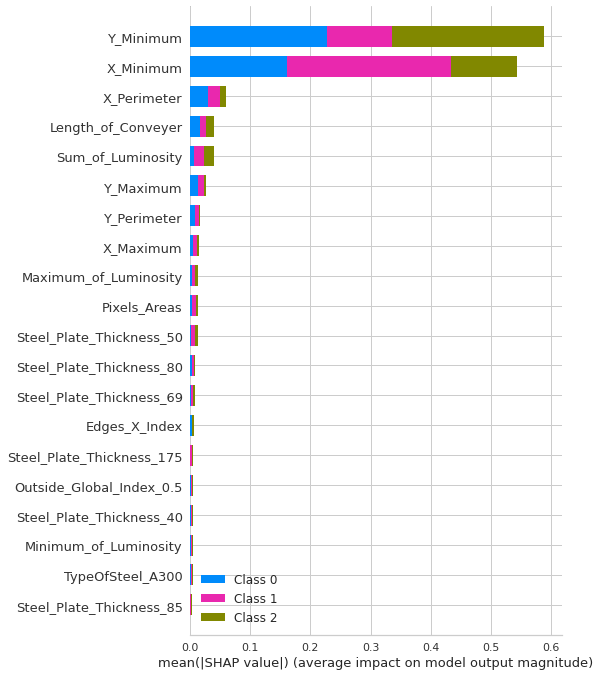

In [0]:
interpret_model(best_auc_model)

''

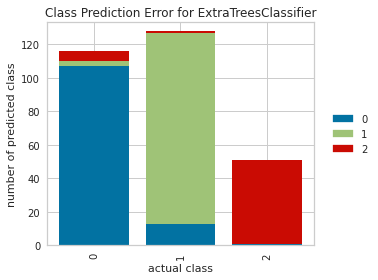

In [0]:
plot_model(best_auc_model, plot = 'error')

''

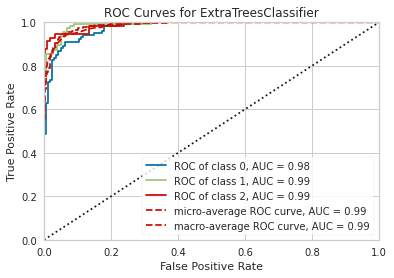

In [0]:
plot_model(best_auc_model, plot = 'auc')

''

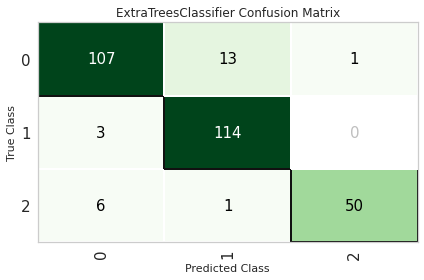

In [0]:
plot_model(best_auc_model, plot = 'confusion_matrix')

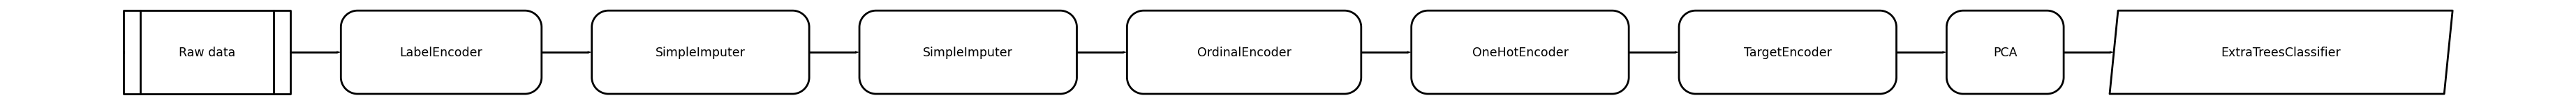

In [0]:
plot_model(best_auc_model, plot = 'pipeline')

''

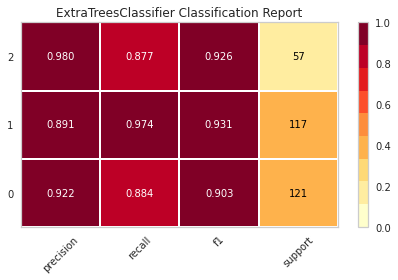

In [0]:
plot_model(best_auc_model, plot = 'class_report')

''

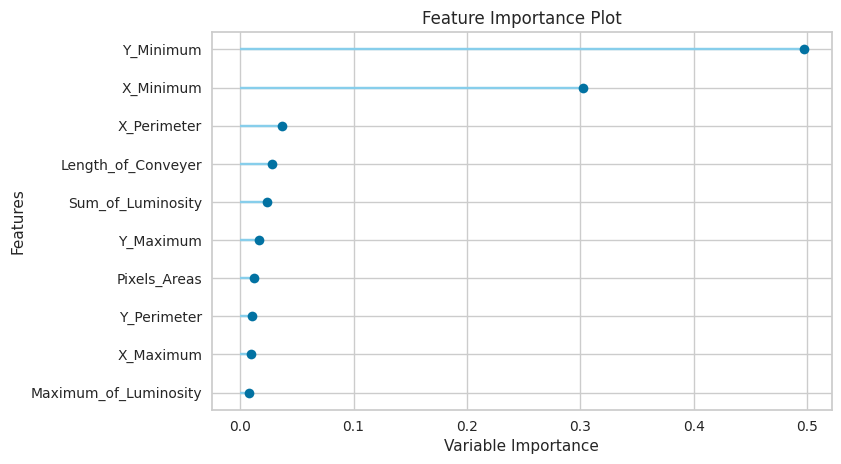

In [0]:
plot_model(best_auc_model, plot = 'feature')

## SHAP

https://m.mage.ai/how-to-interpret-and-explain-your-machine-learning-models-using-shap-values-471c2635b78e

Start here 
- Summary plots for SHAP
Directionality impact global
Individual contributions
Waterfall plot vs Force plot (local contributions - individual contributions) vs Beeswarm plots vs Bar Plots vs Dependence Plots (interaction effects) That's far enough.

In [0]:
import shap

In [0]:
training_data = get_config(variable="X_train")
training_data 

X_Minimum 
 X_Maximum 
 Y_Minimum 
 Y_Maximum 
 Pixels_Areas 
 X_Perimeter 
 Y_Perimeter 
 Sum_of_Luminosity 
 Minimum_of_Luminosity 
 Maximum_of_Luminosity 
 Length_of_Conveyer 
 TypeOfSteel_A300 
 TypeOfSteel_A400 
 Steel_Plate_Thickness 
 Edges_Index 
 Empty_Index 
 Square_Index 
 Outside_X_Index 
 Edges_X_Index 
 Edges_Y_Index 
 Outside_Global_Index 
 LogOfAreas 
 Log_X_Index 
 Log_Y_Index 
 Orientation_Index 
 Luminosity_Index 
 SigmoidOfAreas 
 
 
 
 
 574 
 41 
 196 
 579795 
 579857 
 6057 
 209 
 138 
 627913 
 39 
 126 
 1358 
 0 
 1 
 40 
 0.0604 
 0.3697 
 0.4 
 0.1141 
 0.7416 
 0.4493 
 0 
 3.7823 
 2.1903 
 1.7924 
 -0.6 
 -0.1901 
 1 
 
 
 647 
 41 
 211 
 2052389 
 2052461 
 6476 
 296 
 156 
 675748 
 43 
 124 
 1356 
 0 
 1 
 40 
 0.0605 
 0.4709 
 0.4235 
 0.1254 
 0.5743 
 0.4615 
 0 
 3.8113 
 2.2304 
 1.8573 
 -0.5765 
 -0.1848 
 1 
 
 
 632 
 109 
 181 
 1867972 
 1868026 
 1843 
 171 
 85 
 230162 
 115 
 135 
 1356 
 0 
 1 
 40 
 0.1608 
 0.526 
 0.75 
 0.0531 
 0.4211 
 0.6353 
 0 
 3.2655 
 1.8573 
 1.7324 
 -0.25 
 -0.0243 
 1 
 
 
 888 
 83 
 99 
 690095 
 690120 
 279 
 21 
 25 
 30271 
 61 
 135 
 1366 
 1 
 0 
 80 
 0.1215 
 0.3025 
 0.64 
 0.0117 
 0.7619 
 1 
 1 
 2.4456 
 1.2041 
 1.3979 
 0.36 
 -0.1524 
 0.6574 
 
 
 1090 
 1038 
 1047 
 603596 
 603608 
 80 
 12 
 12 
 9136 
 100 
 133 
 1358 
 0 
 1 
 40 
 0.458 
 0.2593 
 0.75 
 0.0066 
 0.75 
 1 
 1 
 1.9031 
 0.9542 
 1.0792 
 0.25 
 -0.1078 
 0.215 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 978 
 828 
 837 
 2451285 
 2451296 
 67 
 13 
 11 
 8107 
 112 
 134 
 1350 
 0 
 1 
 40 
 0.76 
 0.3232 
 0.8182 
 0.0067 
 0.6923 
 1 
 1 
 1.8261 
 0.9542 
 1.0414 
 0.1818 
 -0.0547 
 0.2051 
 
 
 1162 
 387 
 403 
 1349016 
 1349036 
 231 
 25 
 20 
 23488 
 65 
 126 
 1694 
 1 
 0 
 80 
 0.4569 
 0.2781 
 0.8 
 0.0094 
 0.64 
 1 
 1 
 2.3636 
 1.2041 
 1.301 
 0.2 
 -0.2056 
 0.5296 
 
 
 369 
 951 
 961 
 494451 
 494461 
 81 
 11 
 10 
 13311 
 141 
 182 
 1387 
 0 
 1 
 40 
 0.6143 
 0.19 
 1 
 0.0072 
 0.9091 
 1 
 0.5 
 1.9085 
 1 
 1 
 0 
 0.2839 
 0.2061 
 
 
 1074 
 895 
 904 
 10343919 
 10343928 
 50 
 11 
 9 
 6005 
 112 
 127 
 1360 
 0 
 1 
 40 
 0.6706 
 0.3827 
 1 
 0.0066 
 0.8182 
 1 
 0.5 
 1.699 
 0.9542 
 0.9542 
 0 
 -0.0617 
 0.1862 
 
 
 503 
 39 
 195 
 2240199 
 2240365 
 10986 
 755 
 444 
 1273434 
 44 
 142 
 1404 
 0 
 1 
 40 
 0.0556 
 0.5758 
 0.9398 
 0.1111 
 0.2066 
 0.3739 
 1 
 4.0408 
 2.1931 
 2.2201 
 0.0602 
 -0.0944 
 1 
 
 
 
 688 rows × 27 columns

In [0]:
saved_model = load_model('top4defects_model')
train_pipe = saved_model[:-1].transform(top_defects)
train_pipe['Labels'] = train_pipe['Labels'].map({'Bumps': 0, 'K_Scratch': 1, 'Z_Scratch': 2})
train_pipe

Transformation Pipeline and Model Successfully Loaded


X_Minimum 
 X_Maximum 
 Y_Minimum 
 Y_Maximum 
 Pixels_Areas 
 X_Perimeter 
 Y_Perimeter 
 Sum_of_Luminosity 
 Minimum_of_Luminosity 
 Maximum_of_Luminosity 
 Length_of_Conveyer 
 TypeOfSteel_A300 
 TypeOfSteel_A400 
 Steel_Plate_Thickness_40 
 Steel_Plate_Thickness_80 
 Steel_Plate_Thickness_70 
 Steel_Plate_Thickness_50 
 Steel_Plate_Thickness_185 
 Steel_Plate_Thickness_100 
 Steel_Plate_Thickness_60 
 Steel_Plate_Thickness_175 
 Steel_Plate_Thickness_120 
 Steel_Plate_Thickness_211 
 Steel_Plate_Thickness_69 
 Steel_Plate_Thickness_85 
 Steel_Plate_Thickness_200 
 Steel_Plate_Thickness_143 
 Steel_Plate_Thickness_290 
 Steel_Plate_Thickness_150 
 Edges_Index 
 Empty_Index 
 Square_Index 
 Outside_X_Index 
 Edges_X_Index 
 Edges_Y_Index 
 Outside_Global_Index_0 
 Outside_Global_Index_1 
 Outside_Global_Index_0.5 
 LogOfAreas 
 Log_X_Index 
 Log_Y_Index 
 Orientation_Index 
 Luminosity_Index 
 SigmoidOfAreas 
 Labels 
 
 
 
 
 158 
 0.348296 
 0.953783 
 0.398733 
 -0.390422 
 -0.177145 
 -0.373670 
 0.475329 
 0.658525 
 0.663597 
 -0.279241 
 -0.038637 
 0.064672 
 0.057906 
 0.048313 
 -0.310270 
 -0.129739 
 -0.098335 
 -0.031322 
 0.020831 
 0.124970 
 -0.150751 
 -0.032320 
 0.017384 
 -0.138097 
 0.061674 
 0.020044 
 0.000769 
 0.013865 
 0.028174 
 -0.030583 
 0.022454 
 -0.097563 
 -0.000236 
 -0.006929 
 0.028569 
 0.006235 
 -0.050335 
 -0.006192 
 -0.003652 
 0.000059 
 0.000047 
 2.775558e-17 
 3.469447e-17 
 -4.996004e-16 
 2 
 
 
 159 
 0.675255 
 0.857107 
 1.131405 
 0.246591 
 0.233744 
 -0.436026 
 0.032790 
 -0.278021 
 -0.212187 
 0.037344 
 -0.228596 
 -0.062279 
 0.211806 
 -0.092307 
 0.126262 
 -0.002710 
 -0.190795 
 -0.046364 
 0.040792 
 -0.082852 
 0.051173 
 0.117199 
 -0.099638 
 -0.030556 
 0.038179 
 -0.084631 
 0.169661 
 0.140145 
 -0.153918 
 -0.044795 
 0.007044 
 0.029814 
 0.121227 
 -0.036401 
 -0.001986 
 -0.011991 
 0.055314 
 -0.034647 
 -0.003998 
 -0.000350 
 -0.000072 
 -5.551115e-17 
 -2.775558e-17 
 -1.110223e-16 
 2 
 
 
 160 
 1.086164 
 -0.414593 
 1.203950 
 -0.117101 
 0.133067 
 -0.080960 
 0.159849 
 -0.000594 
 -0.058296 
 0.291743 
 -0.149235 
 -0.227696 
 -0.136961 
 0.107908 
 -0.093058 
 -0.020629 
 -0.066440 
 0.021589 
 0.019397 
 -0.009283 
 0.126036 
 0.069155 
 -0.114656 
 -0.031456 
 0.039869 
 -0.025351 
 0.013861 
 0.001703 
 -0.016531 
 -0.008634 
 -0.002145 
 0.029085 
 0.037397 
 -0.001564 
 -0.006630 
 -0.012552 
 0.028709 
 0.004049 
 0.000362 
 0.000209 
 0.000010 
 3.330669e-16 
 2.775558e-16 
 0.000000e+00 
 2 
 
 
 161 
 1.106408 
 -0.474025 
 1.197201 
 -0.043114 
 0.130463 
 -0.088559 
 0.151013 
 -0.080040 
 -0.072358 
 -0.120991 
 0.046307 
 0.078196 
 0.214271 
 -0.244786 
 0.320502 
 -0.026294 
 -0.227246 
 0.011738 
 -0.043677 
 -0.067811 
 0.027730 
 0.097697 
 -0.034265 
 0.026939 
 -0.021105 
 0.044408 
 -0.118505 
 -0.014553 
 0.027645 
 0.028940 
 -0.000523 
 0.025397 
 -0.030384 
 -0.013177 
 0.021648 
 0.023272 
 0.019537 
 0.007470 
 0.000473 
 0.000162 
 -0.000046 
 2.775558e-16 
 1.110223e-16 
 -1.110223e-16 
 2 
 
 
 162 
 0.694142 
 0.859202 
 1.089642 
 0.292970 
 0.294348 
 -0.365390 
 0.036762 
 -0.217637 
 -0.142835 
 -0.135730 
 0.102384 
 0.076546 
 -0.180512 
 -0.272168 
 0.192843 
 -0.153720 
 -0.195102 
 -0.175357 
 -0.168875 
 -0.070381 
 0.182950 
 0.113037 
 -0.228073 
 0.008040 
 0.073557 
 -0.035220 
 0.031202 
 -0.055231 
 0.080069 
 0.020618 
 0.002820 
 -0.030876 
 0.099348 
 0.020654 
 -0.004737 
 -0.023427 
 -0.007334 
 -0.024605 
 -0.002770 
 0.000443 
 -0.000011 
 3.608225e-16 
 1.665335e-16 
 -1.110223e-16 
 2 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1263 
 1.006411 
 -0.330577 
 -0.386198 
 -0.202597 
 0.026264 
 -0.151048 
 0.217888 
 0.019246 
 0.108242 
 0.523112 

In [0]:
type(saved_model)

Out[33]: pycaret.internal.pipeline.Pipeline

In [0]:
explainer = shap.TreeExplainer(saved_model.named_steps['actual_estimator'])
shap_values = explainer.shap_values(train_pipe)

In [0]:
# To get around the omitted visualization section warning: https://towardsdatascience.com/tutorial-on-displaying-shap-force-plots-in-python-html-4883aeb0ee7c
# Converting the SHAP force plots in Python HTML

# Entire SHAP force plot 
# First dataset
defect_idx = 0
force_plot = shap.force_plot(explainer.expected_value[defect_idx], shap_values[defect_idx])
shap_html = f"{shap.getjs()}{force_plot.html()}"
displayHTML(shap_html)

In [0]:
Explainer = explainer(train_pipe)
print(Explainer)

expl = shap.Explanation(Explainer.values, Explainer.base_values[0][0], Explainer.data)
expl

.values =
array([[[ 0.0969505 , -0.1950659 ,  0.0981154 ],
        [ 0.02285171, -0.020847  , -0.00200471],
        [-0.19413239,  0.0585812 ,  0.13555119],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.04007343, -0.18399362,  0.14392019],
        [ 0.00548126, -0.0048095 , -0.00067176],
        [-0.42998632, -0.05773905,  0.48772536],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       [[ 0.06925202, -0.26308841,  0.1938364 ],
        [-0.00082794, -0.0018202 ,  0.00264814],
        [-0.41277372, -0.05906358,  0.4718373 ],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

       [[ 0.24964235, -0.31114841,  0.06150606],
 

## SHAP Bar Plot Across All Classes

Bar summary SHAP plots allow us to see which features contribute most to the model across all classes considered (bumps, k-scratches, and z-scratches). For all three classes considered, the X_Minimum and Y_Minimum features were overwhelming contributing factors in classifying between all of them. Y_Minimum was a major factor for predicting classes 0 and 2 (bumps and z-scratches), while X_Minimum was more of an importanct factor for Class 1 (k-scratches).

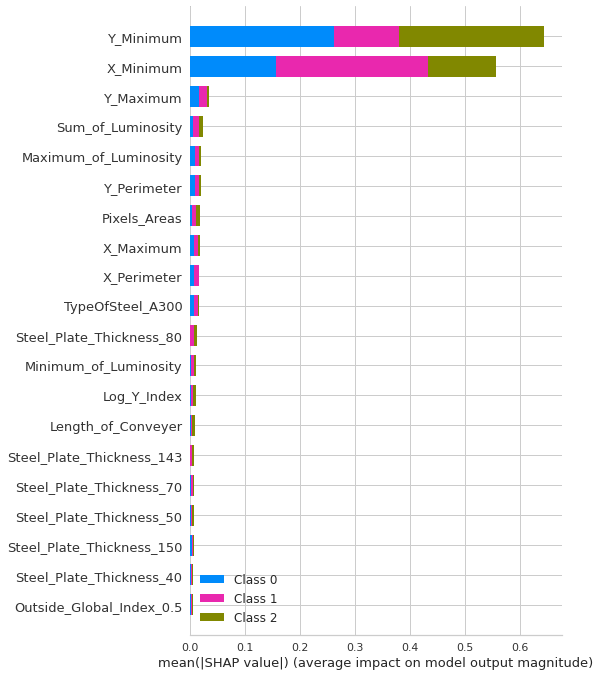

In [0]:
# Summary Plot
shap.summary_plot(shap_values, train_pipe)

## SHAP Beeswarm for Classifying Bumps
In the beeswarm plot below, we're able to view important relationships that contributed to the classification of bump defects (Bumps). This plot shows how the different features affect the prediction of bump defects. Each dot corresponds to 1 dataset in the study that was classified as Bumps. 

For Bumps, Y_Minimum and X_Minimum are the most important features that contributed to the predictions. When Y_Minimum was low, it had a large positive impact on predicting bumps while the opposite was true for X_minimum. When X_minimum was high, it had a large positive impact on predicting bumps.

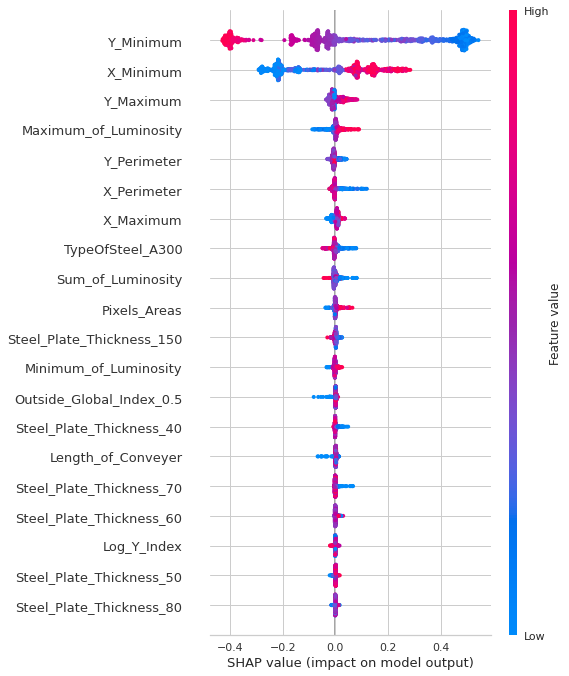

In [0]:
# Summary Plot for Class 0 {'Bumps': 0, 'K_Scratch': 1, 'Z_Scratch': 2}

# Largest two classes are the Bumps and K-Scratch. Maybe I can go through the interpretation of Bumps and say that the rest of up to the reader with a quick review afterwards
shap.summary_plot(shap_values[0], train_pipe)

## SHAP Beeswarm for Classifying K_Scratches
In the beeswarm plot below, we're able to view important relationships that contributed to the classification of k-scratch defects (K_Scratch). This plot shows how the different features affect the prediction of k-scratch defects. As in the previous case, each dot corresponds to 1 dataset in the study that was classified as k-scratch defects. 

For k-scratch defects, X_Minimum and Y_Minimum were the most important features that contributed to the predictions. When X_Minimum was low, it had an overwhelmingly large positive impact on predicting k-scratch defects. For Y_Minimum, the case was not so cut and dry. When Y_Minimum was low, it had a negative impact on predicting k-scratch defects but the results were mixed with larger values.

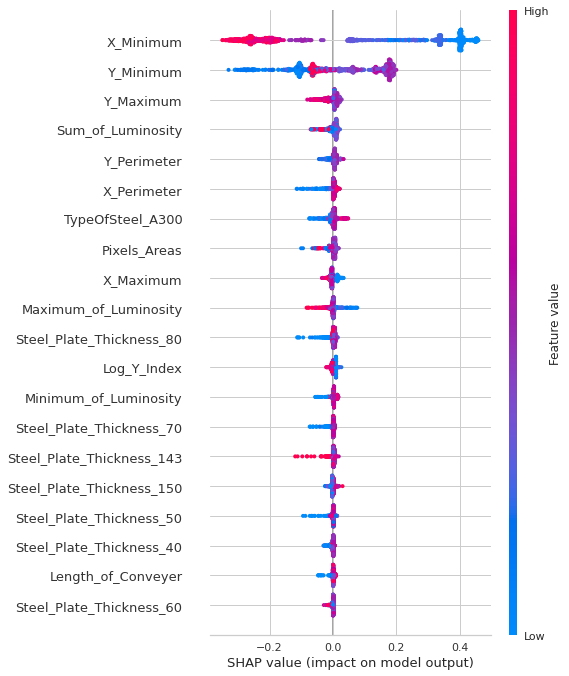

In [0]:
# Summary Plot for Class 1 {'Bumps': 0, 'K_Scratch': 1, 'Z_Scratch': 2}
shap.summary_plot(shap_values[1], train_pipe)

## SHAP Beeswarm for Classifying Z_Scratches
In the beeswarm plot below, we're able to view important relationships that contributed to the classification of z-scratch defects (Z_Scratch). This plot shows how the different features affect the prediction of z-scratch defects. As in the previous case, each dot corresponds to 1 dataset in the study that was classified as z-scratch defects. 

For z-scratch defects, Y_Minimum and X_Minimum were the most important features that contributed to the predictions, just like for bump predictions. When X_Minimum was high, it had an overwhelmingly large positive impact on predicting z-scratch defects. For X_Minimum, the case was pretty cut and dry. When X_Minimum was high, it had a positive impact on predicting z-scratch defects.

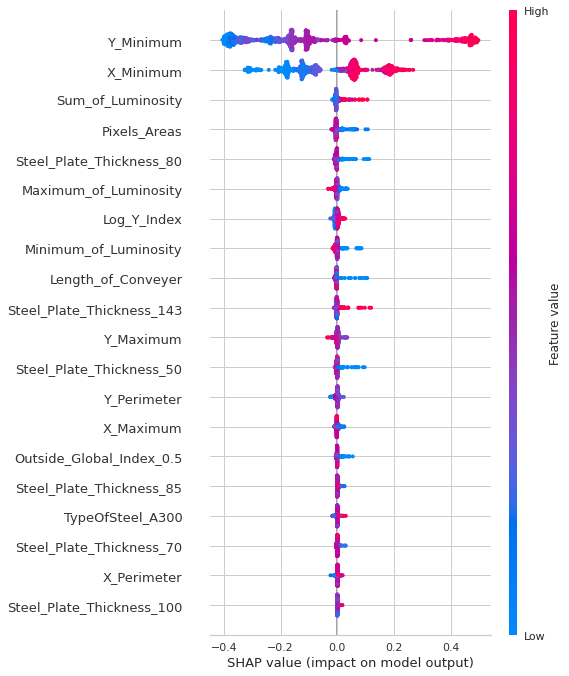

In [0]:
# Summary Plot for Class 1 {'Bumps': 0, 'K_Scratch': 1, 'Z_Scratch': 2}
shap.summary_plot(shap_values[2], train_pipe)

## SHAP Summary

In the beeswarm plots above, we're able to view important relationships that contributed to the classification of bump, k-scratch, and z-scratch defects. 

Across all three plots, these are the following observations:
1. A sample has a high likelihood to be classified as a bump defect if Y_Minimum is low and X_Minimum is high. 
2. A sample with a low Y_Minimum could be classified as a k-scratch defect but the X_Minimum contribution is mixed. 
3. A sample has a high likelihood to be classified as a z-scratch defect if Y_Minimum is high and X_Minimum is high. 

In the Conclusions section, I propose a few suggestions to extra features to capture for the process team to reduce defects in the future. 

Other plots that would be helpful for further analysis would be the following:
- Partial dependence plot would display the relationship between the target (defect type) and feature for a model. It would show if the nature of the relationship is linear, polynomial, etc.
- Individual force plots could be able to show the local contributions of features to individual observations.
- Waterfall plots also show local 

I've included examples of the last two below.

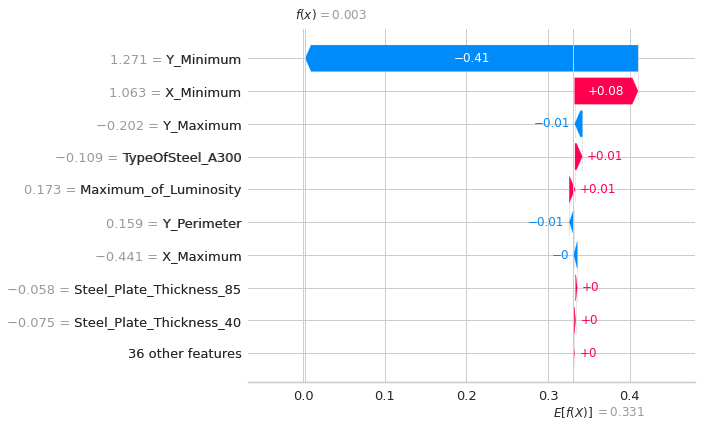

In [0]:
# Waterfall plot for a single instance prediction on the 8th row
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=train_pipe.iloc[row],  
                                         feature_names=train_pipe.columns.tolist()))


In [0]:
# Single force plot of a single model prediction
i = 15
force_plot = shap.force_plot(explainer.expected_value[0], shap_values[0][i], train_pipe.values[i], feature_names = train_pipe.columns)
shap_html = f"{shap.getjs()}{force_plot.html()}"
displayHTML(shap_html)



# Conclusions

This notebook was to highlight a typical process of using pycaret and tuned off the shelf models to predict faulty steel plates by showing relationships between features. 

There are a few major changes that I would make on a real dataset. 
1. In an actual project, I would separate the data into seen and unseen data. The seen data would have been used to train the data and validation for tuning. The unseen data (test) would have been used to observe the generalizablity of the model or how the model would work with unseen data "in the wild", so to speak. 
2. The classes in the original dataset are imbalanced. I would also test implementing SMOTE to balance out the classes before modeling. 
3. From a manufacturing standpoint, I would also touch base with the quality manager/shift manager to see if 

In the next notebook, I'll put this model into production, meaning establishing model registering, model training, data preprocessing within MLFlow. I separate out the pycaret steps into distinct pca and extra trees model through sklearn.The parameters for the tuned extra trees model are taken from this notebook and implemented in the next one during model registry.